Exportando os Dados dos Clientes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_data = pd.read_csv(f'Dados_Clientes.csv', na_values='na')

In [3]:
df_data.head(3)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20


In [4]:
df_data['default'].value_counts()

default
0    8500
1    1627
Name: count, dtype: int64

Excluindo todoa dados faltantes no "na"

In [5]:
df_data.dropna(inplace=True) 

In [6]:
df_data.isna().any() # Verifica se há dados faltantes em cada coluna

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade               False
estado_civil               False
salario_anual              False
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

Padronização de Colunas Monetárias "limite_credito" e "valor_transacoes_12m" para Float

In [7]:
df_data['valor_transacoes_12m'] = df_data['valor_transacoes_12m'].apply(lambda valor:float(valor.replace(".","").replace(",",".")))
df_data['limite_credito'] = df_data['limite_credito'].apply(lambda valor:float(valor.replace(".","").replace(",",".")))

Excluindo a coluna "id", Pois não intefere na analize dos dados

In [8]:
df_data = df_data.drop('id', axis=1) 

Exibindo os tipos de dados de cada coluna

In [9]:
df_data.dtypes

default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

In [10]:
df_data.shape

(7081, 15)

Visualisando as colonuas com formato object

In [11]:
df_data.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,7081,2,M,3706
escolaridade,7081,5,mestrado,2591
estado_civil,7081,3,casado,3564
salario_anual,7081,5,menos que $40K,2792
tipo_cartao,7081,4,blue,6598


Quantidade de Adimplentes e Inadimplentes

In [12]:
print(df_data[df_data['default'] == 0].shape)
print(df_data[df_data['default'] == 1].shape)

(5968, 15)
(1113, 15)


Verificando a porcentagem de clientes adimplentes e inadimplentes 

In [13]:
df_data['default'].value_counts(normalize=True) * 100

default
0    84.281881
1    15.718119
Name: proportion, dtype: float64

Clientes Adimplentes (default = 0)

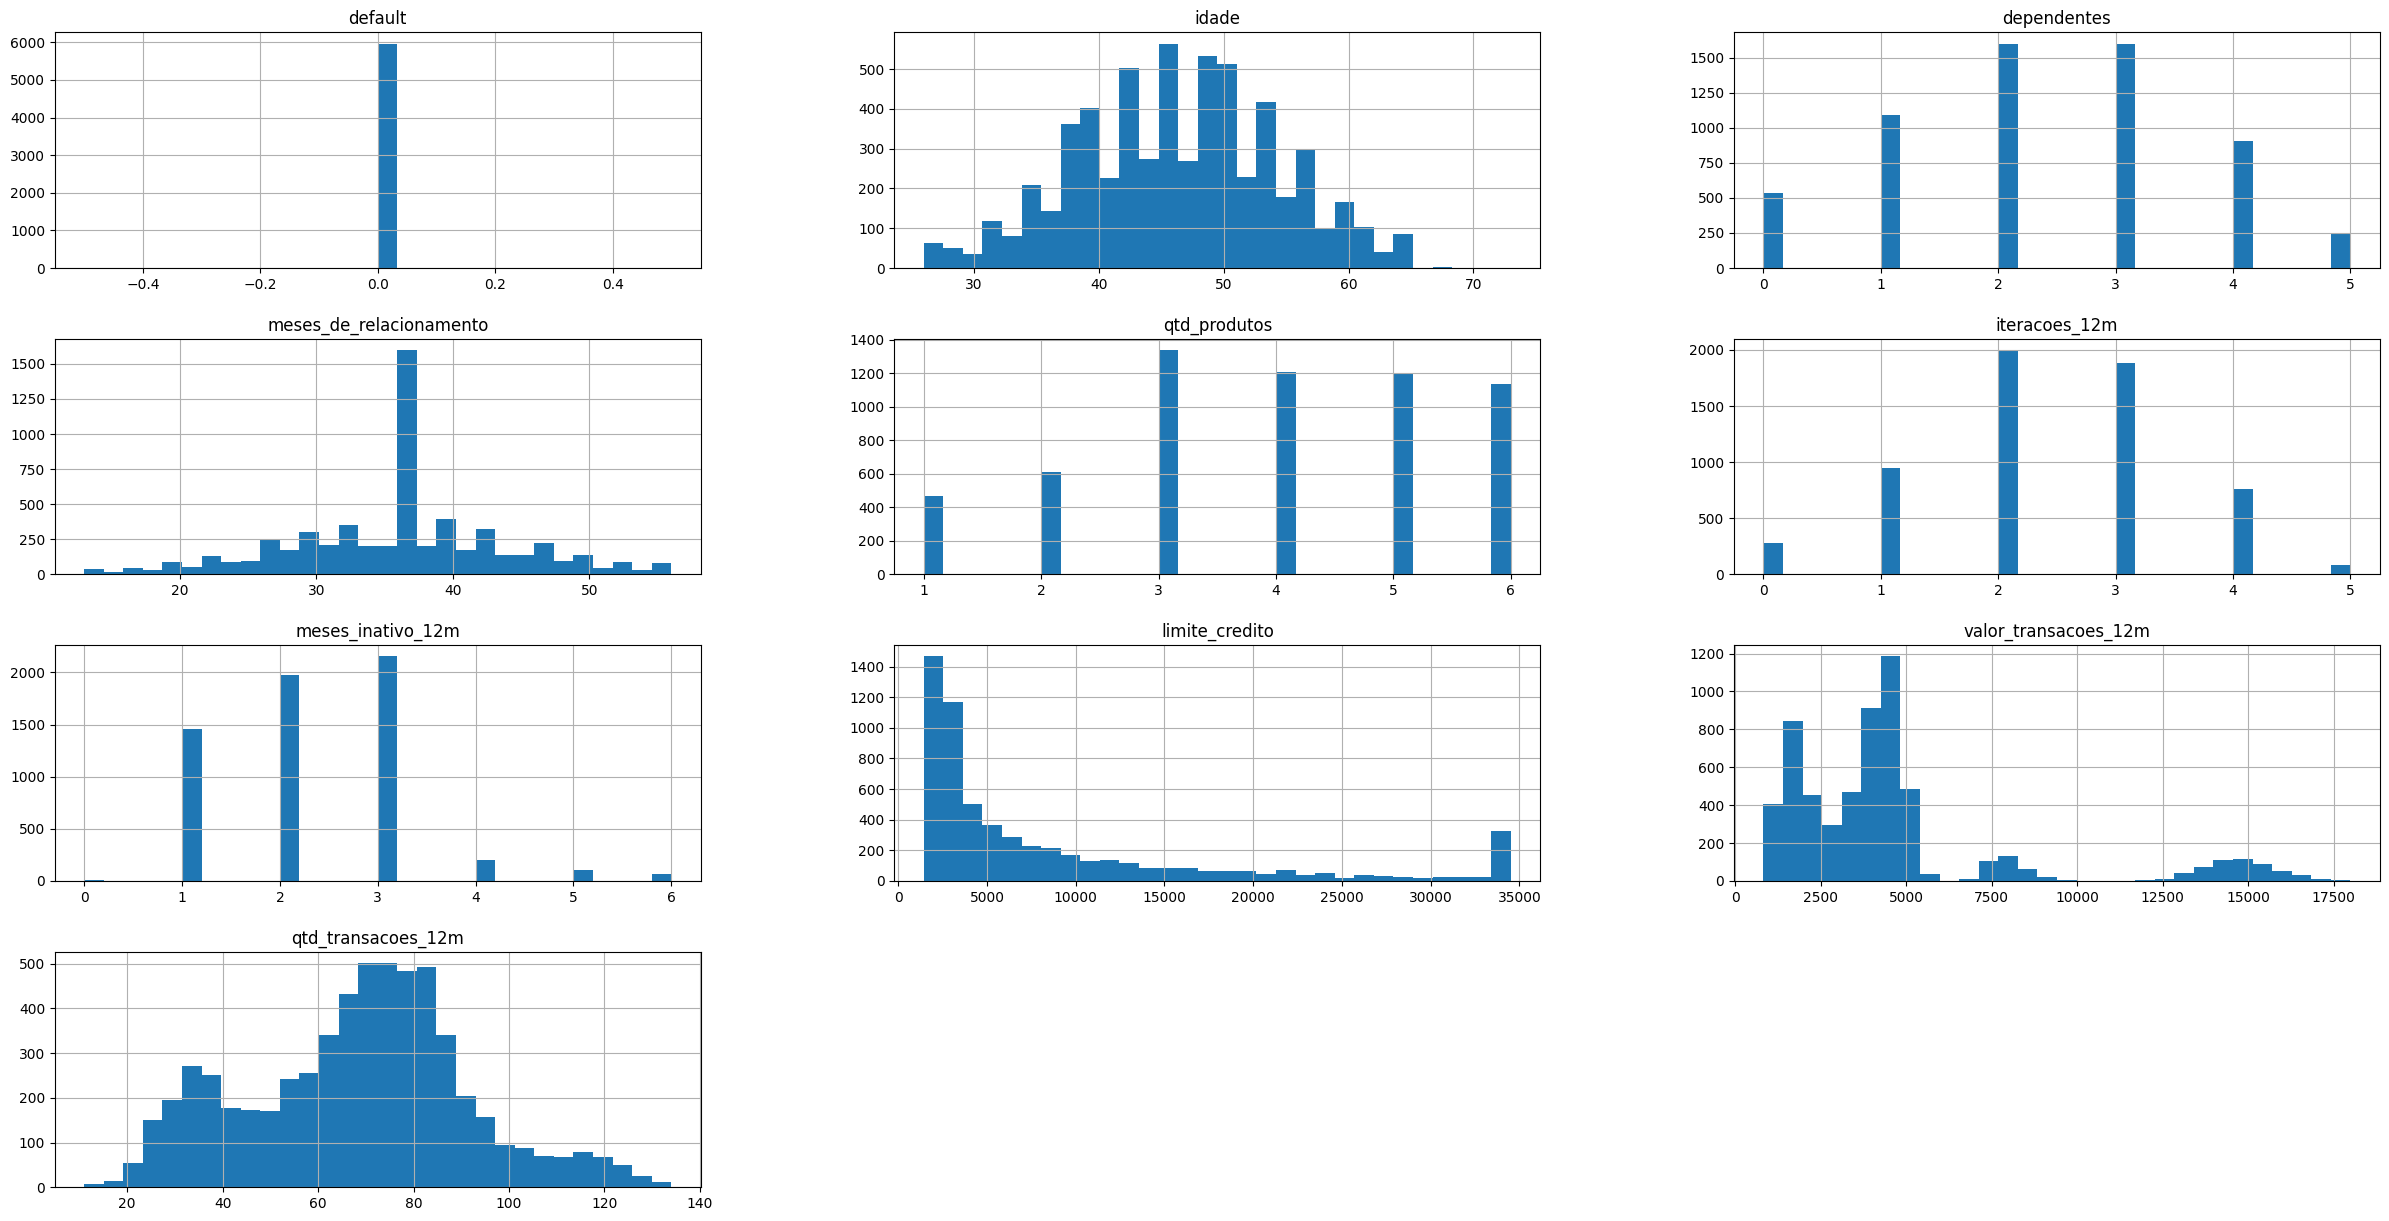

In [14]:
df_data[df_data['default'] == 0].hist(bins=30, figsize=(30, 15))
plt.show()

Clientes Inadimplentes (default = 1)

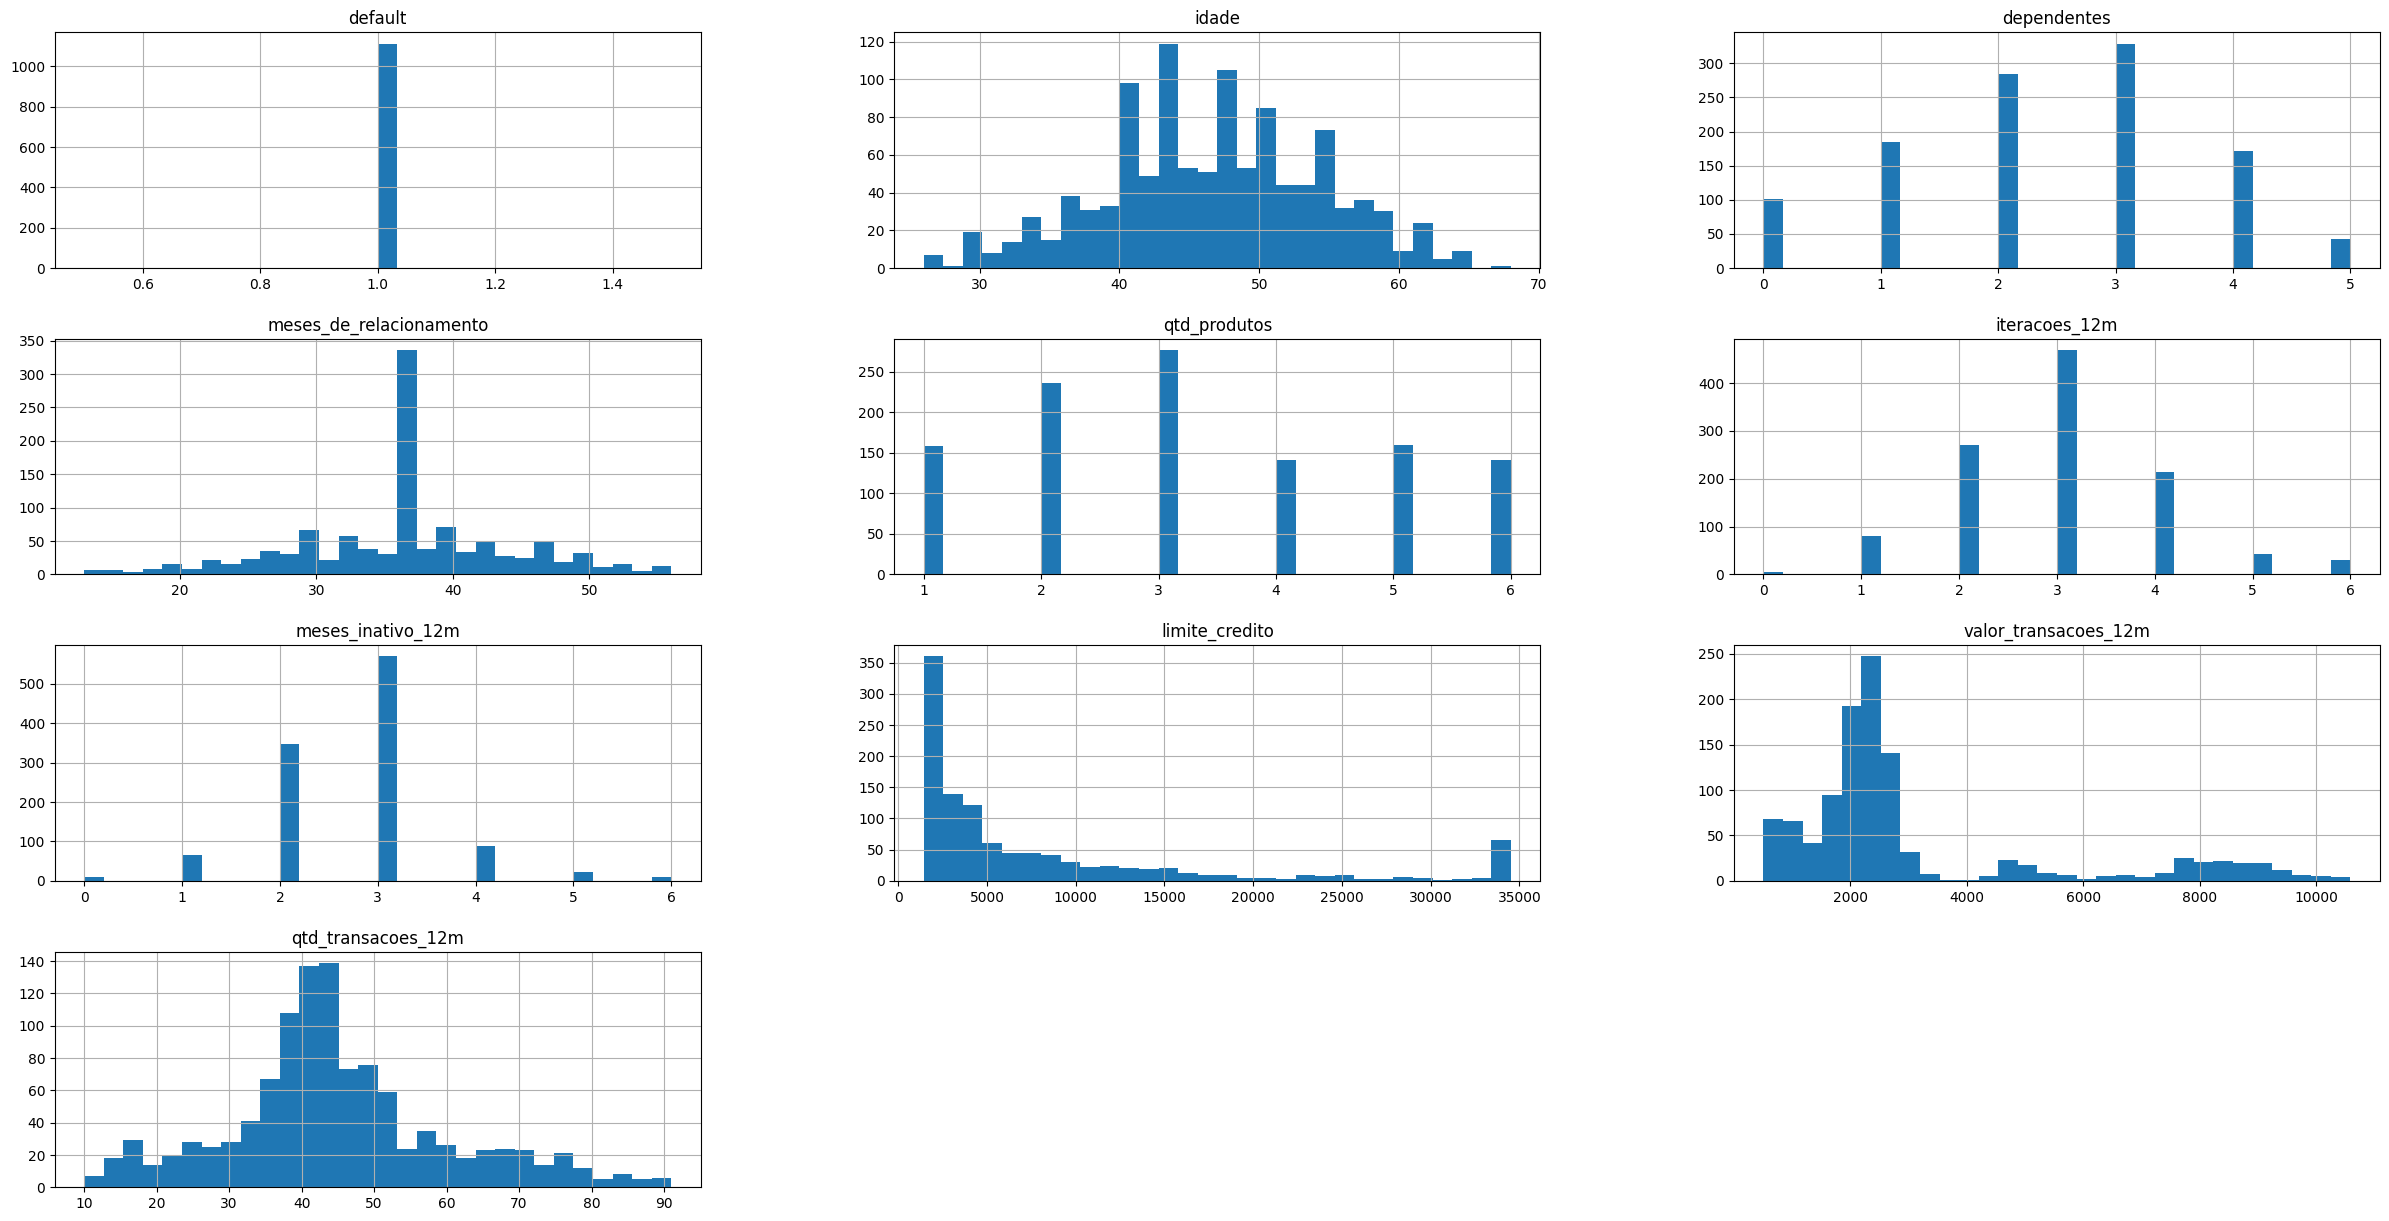

In [15]:
df_data[df_data['default'] == 1].hist(bins=30, figsize=(30, 15))
plt.show()

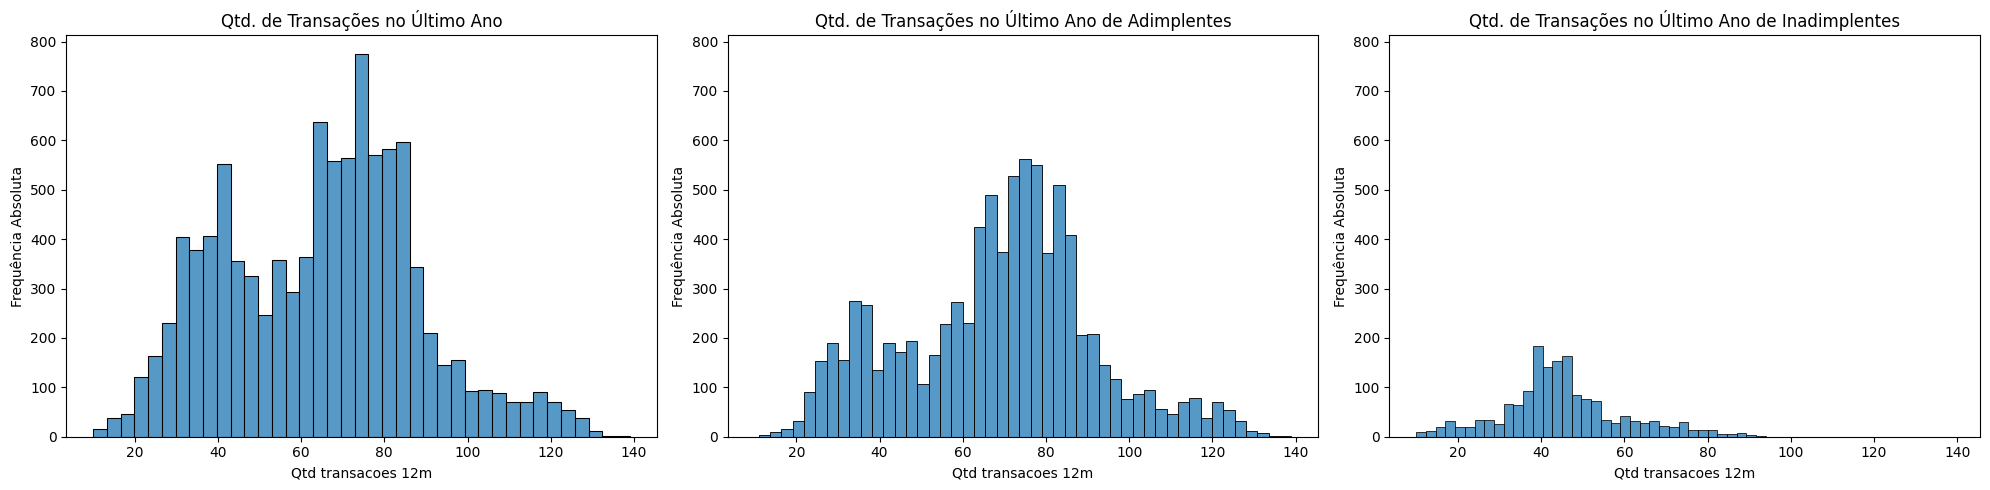

In [16]:
# Carregar o dataframe
df = pd.read_csv(f'Dados_Clientes.csv', na_values='na')

# Dividir os dados em adimplentes e inadimplentes
df_adimplente = df[df['default'] == 0]
df_inadimplente = df[df['default'] == 1]

# Definindo a coluna e os títulos
coluna = 'qtd_transacoes_12m'
titulos = [
    'Qtd. de Transações no Último Ano',
    'Qtd. de Transações no Último Ano de Adimplentes',
    'Qtd. de Transações no Último Ano de Inadimplentes'
]

# Configurar os eixos e o gráfico
eixo = 0
max_y = 0
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:
    # Criar gráfico de barras (histograma)
    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.replace('_', ' ').capitalize(), ylabel='Frequência Absoluta')

    # Atualiza o maior valor do eixo Y
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y

    eixo += 1

# Aplicar o mesmo limite máximo do eixo Y para todos os gráficos
for eixo_atual in eixos:
    eixo_atual.set(ylim=(0, max_y))

# Ajusta o layout e exibe o gráfico
figura.tight_layout()
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

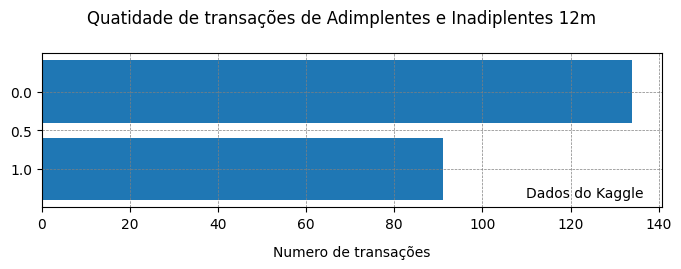

In [17]:
fig, ax = plt.subplots(figsize = (8,2))

ax.barh(df_data['default'], df_data['qtd_transacoes_12m'])
ax.invert_yaxis() # Ordena do maior para o menor

fig.suptitle('Quatidade de transações de Adimplentes e Inadiplentes 12m', y=1.10)

plt.figtext(0.73, 0.16, 'Dados do Kaggle')

plt.grid(color= 'gray', linestyle='--', linewidth=0.5) # Estiliz de linhas no grafico 

plt.xlabel('Numero de transações')
ax.xaxis.labelpad = 10 # Espaçamento 
plt.show